In [1]:
import pandas as pd
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# Loading spaCy model
nlp = spacy.load('en_core_web_md')

# Function to embed text
def embed_text(text):
    doc = nlp(text)
    return doc.vector.tolist()

# Load data from Excel
df = pd.read_excel(r"C:\\Users\\ADITYA\\Downloads\\Analogous Empathy.xlsx")

# Assuming 'ideas' is the column containing text to embed
df['vectors'] = df['ideas'].apply(embed_text)

# Save back to Excel with vectors column
df.to_excel('output_with_vectors.xlsx', index=False)

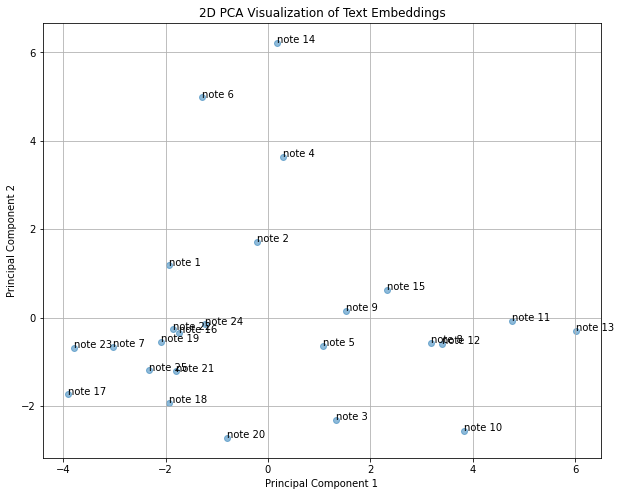

In [2]:
vectors_list = df['vectors'].tolist()

# Perform PCA on vectors
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors_list)

# Add PCA components to DataFrame
df['PCA1'] = vectors_pca[:, 0]
df['PCA2'] = vectors_pca[:, 1]

# Generate labels for the plot
df['label'] = ['note {}'.format(i+1) for i in range(len(df))]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5)

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.title('2D PCA Visualization of Text Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

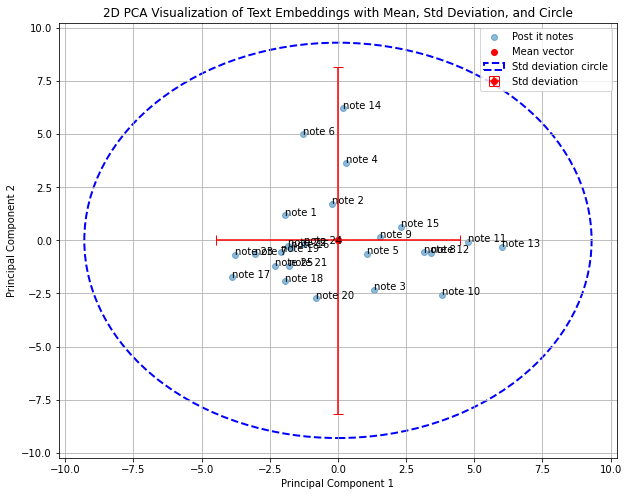

In [3]:
# Calculate mean and standard deviation of embeddings
embeddings_matrix = np.array(vectors_list)
mean_vector = np.mean(embeddings_matrix, axis=0)
std_vector = np.std(embeddings_matrix, axis=0)

# Perform PCA on mean and standard deviation vectors
mean_pca = pca.transform([mean_vector])[0]
std_pca = pca.transform([std_vector])[0]

# Calculate the radius for the circle (use norm of std_pca to get a single radius value)
radius = np.linalg.norm(std_pca)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

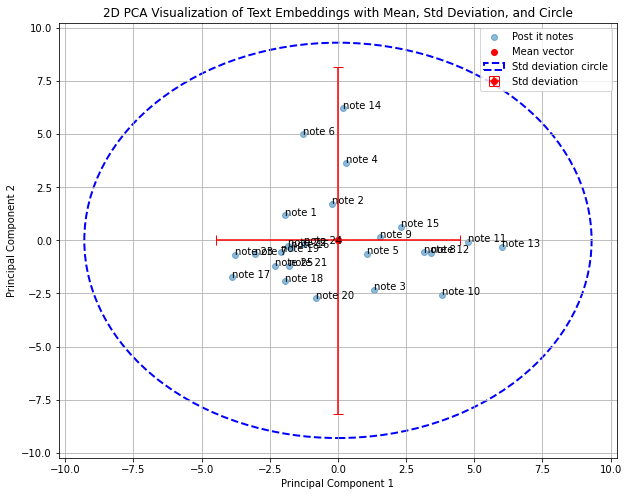

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                1.795869
2    note 3                4.307308
3    note 4                2.000161
4    note 5                1.693420
5    note 6                2.074296
6    note 7                2.142092
7    note 8                2.091727
8    note 9                0.897352
9   note 10                2.089473
10  note 11                1.657769
11  note 12                0.233608
12  note 13                1.270444
13  note 14                1.912948
14  note 15                0.940199
15  note 16                1.330906
16  note 17                1.385137
17  note 18                1.598583
18  note 19                0.401392
19  note 20                1.380125
20  note 21                0.727991
21  note 22                0.135756
22  note 23                0.747741
23  note 24                0.542550
24  note 25                0.516615


In [4]:
distances = cdist(vectors_pca, vectors_pca)

# Find nearest prior point distance for each point
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_distances.append(np.min(prior_distances))

# Add nearest prior distances to DataFrame
df['nearest_prior_distance'] = [0] + nearest_prior_distances 
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))
plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

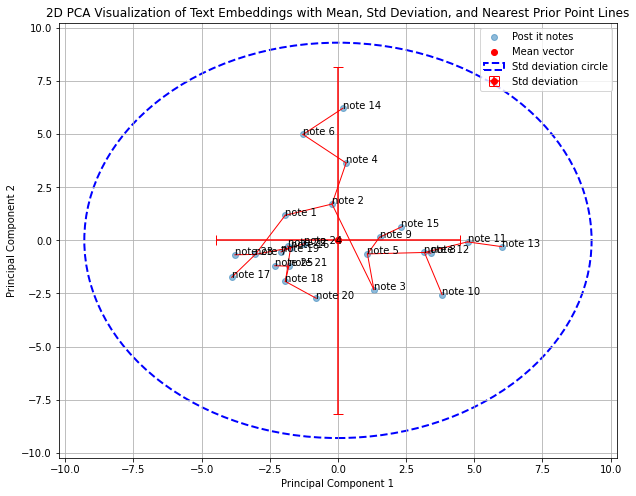

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                1.795869
2    note 3                4.307308
3    note 4                2.000161
4    note 5                1.693420
5    note 6                2.074296
6    note 7                2.142092
7    note 8                2.091727
8    note 9                0.897352
9   note 10                2.089473
10  note 11                1.657769
11  note 12                0.233608
12  note 13                1.270444
13  note 14                1.912948
14  note 15                0.940199
15  note 16                1.330906
16  note 17                1.385137
17  note 18                1.598583
18  note 19                0.401392
19  note 20                1.380125
20  note 21                0.727991
21  note 22                0.135756
22  note 23                0.747741
23  note 24                0.542550
24  note 25                0.516615


In [5]:
distances = cdist(vectors_pca, vectors_pca)

nearest_prior_indices = []
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_idx = np.argmin(prior_distances)
    nearest_prior_indices.append(nearest_prior_idx)
    nearest_prior_distances.append(np.min(prior_distances))

df['nearest_prior_distance'] = [0] + nearest_prior_distances

plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

for i, prior_idx in enumerate(nearest_prior_indices, start=1):
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

print(df[['label', 'nearest_prior_distance']])

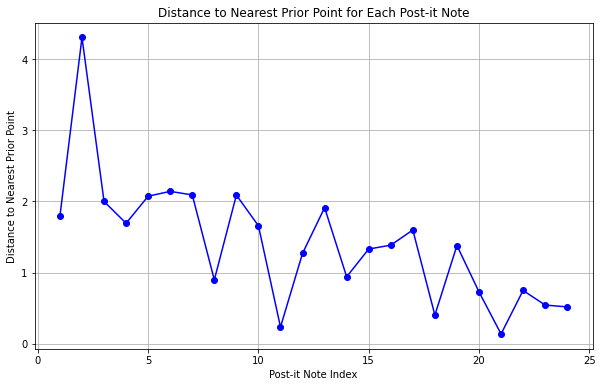

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                1.795869
2    note 3                4.307308
3    note 4                2.000161
4    note 5                1.693420
5    note 6                2.074296
6    note 7                2.142092
7    note 8                2.091727
8    note 9                0.897352
9   note 10                2.089473
10  note 11                1.657769
11  note 12                0.233608
12  note 13                1.270444
13  note 14                1.912948
14  note 15                0.940199
15  note 16                1.330906
16  note 17                1.385137
17  note 18                1.598583
18  note 19                0.401392
19  note 20                1.380125
20  note 21                0.727991
21  note 22                0.135756
22  note 23                0.747741
23  note 24                0.542550
24  note 25                0.516615


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df)), nearest_prior_distances, marker='o', linestyle='-', color='b')
plt.title('Distance to Nearest Prior Point for Each Post-it Note')
plt.xlabel('Post-it Note Index')
plt.ylabel('Distance to Nearest Prior Point')
plt.grid(True)
plt.show()

print(df[['label', 'nearest_prior_distance']])

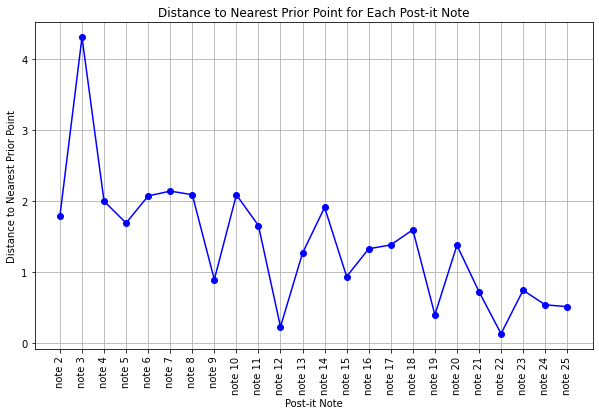

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                1.795869
2    note 3                4.307308
3    note 4                2.000161
4    note 5                1.693420
5    note 6                2.074296
6    note 7                2.142092
7    note 8                2.091727
8    note 9                0.897352
9   note 10                2.089473
10  note 11                1.657769
11  note 12                0.233608
12  note 13                1.270444
13  note 14                1.912948
14  note 15                0.940199
15  note 16                1.330906
16  note 17                1.385137
17  note 18                1.598583
18  note 19                0.401392
19  note 20                1.380125
20  note 21                0.727991
21  note 22                0.135756
22  note 23                0.747741
23  note 24                0.542550
24  note 25                0.516615


In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['label'][1:], nearest_prior_distances, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.title('Distance to Nearest Prior Point for Each Post-it Note')
plt.xlabel('Post-it Note')
plt.ylabel('Distance to Nearest Prior Point')
plt.grid(True)
plt.show()

print(df[['label', 'nearest_prior_distance']])

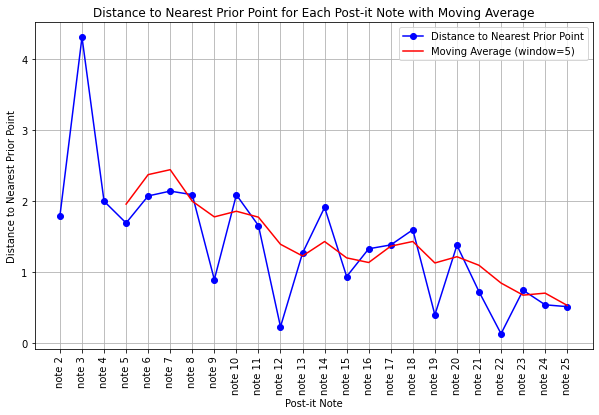

      label  nearest_prior_distance  moving_average
0    note 1                0.000000             NaN
1    note 2                1.795869             NaN
2    note 3                4.307308             NaN
3    note 4                2.000161             NaN
4    note 5                1.693420        1.959351
5    note 6                2.074296        2.374211
6    note 7                2.142092        2.443455
7    note 8                2.091727        2.000339
8    note 9                0.897352        1.779777
9   note 10                2.089473        1.858988
10  note 11                1.657769        1.775683
11  note 12                0.233608        1.393986
12  note 13                1.270444        1.229729
13  note 14                1.912948        1.432848
14  note 15                0.940199        1.202994
15  note 16                1.330906        1.137621
16  note 17                1.385137        1.367927
17  note 18                1.598583        1.433555
18  note 19 

In [8]:
window_size = 5 
df['moving_average'] = df['nearest_prior_distance'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['label'][1:], nearest_prior_distances, marker='o', linestyle='-', color='b', label='Distance to Nearest Prior Point')
plt.plot(df['label'][1:], df['moving_average'][1:], linestyle='-', color='r', label='Moving Average (window={})'.format(window_size))
plt.xticks(rotation=90)
plt.title('Distance to Nearest Prior Point for Each Post-it Note with Moving Average')
plt.xlabel('Post-it Note')
plt.ylabel('Distance to Nearest Prior Point')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances and moving average
print(df[['label', 'nearest_prior_distance', 'moving_average']])

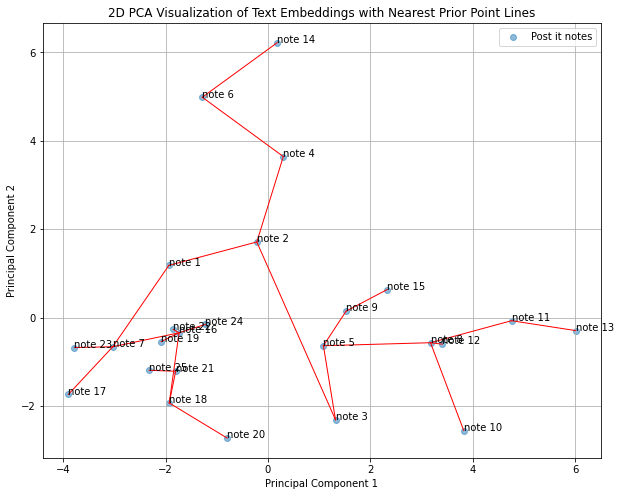

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                1.795869
2    note 3                4.307308
3    note 4                2.000161
4    note 5                1.693420
5    note 6                2.074296
6    note 7                2.142092
7    note 8                2.091727
8    note 9                0.897352
9   note 10                2.089473
10  note 11                1.657769
11  note 12                0.233608
12  note 13                1.270444
13  note 14                1.912948
14  note 15                0.940199
15  note 16                1.330906
16  note 17                1.385137
17  note 18                1.598583
18  note 19                0.401392
19  note 20                1.380125
20  note 21                0.727991
21  note 22                0.135756
22  note 23                0.747741
23  note 24                0.542550
24  note 25                0.516615


In [9]:
distances = cdist(vectors_pca, vectors_pca)

nearest_prior_indices = []
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_idx = np.argmin(prior_distances)
    nearest_prior_indices.append(nearest_prior_idx)
    nearest_prior_distances.append(np.min(prior_distances))

df['nearest_prior_distance'] = [0] + nearest_prior_distances  # First point has no prior point

plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

# Draw red lines between each post-it note and its nearest prior point
for i in range(1, len(df)):
    prior_idx = np.argmin(distances[i, :i])
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                1.795869
2    note 3                4.307308
3    note 4                2.000161
4    note 5                1.693420
5    note 6                2.074296
6    note 7                2.142092
7    note 8                2.091727
8    note 9                0.897352
9   note 10                2.089473
10  note 11                1.657769
11  note 12                0.233608
12  note 13                1.270444
13  note 14                1.912948
14  note 15                0.940199
15  note 16                1.330906
16  note 17                1.385137
17  note 18                1.598583
18  note 19                0.401392
19  note 20                1.380125
20  note 21                0.727991
21  note 22                0.135756
22  note 23                0.747741
23  note 24                0.542550
24  note 25                0.516615


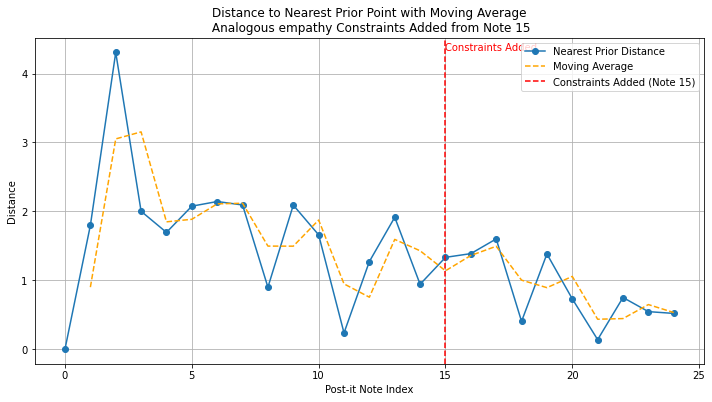

In [11]:
print(df[['label', 'nearest_prior_distance']])

# Plotting distance to nearest prior point with moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['nearest_prior_distance'], marker='o', label='Nearest Prior Distance')

# Calculate moving average
window_size = 2  # Modify as needed
df['moving_avg'] = df['nearest_prior_distance'].rolling(window=window_size).mean()
plt.plot(df.index, df['moving_avg'], linestyle='--', color='orange', label='Moving Average')

# Add vertical line to indicate where constraints are added
plt.axvline(x=15, color='red', linestyle='--', label='Constraints Added (Note 15)')
plt.text(15, max(df['nearest_prior_distance']), 'Constraints Added', color='red', verticalalignment='bottom')

plt.title('Distance to Nearest Prior Point with Moving Average\n Analogous empathy Constraints Added from Note 15')
plt.xlabel('Post-it Note Index')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()